In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


#### Uploading NO2 Dataset

In [2]:
NO2=pd.read_excel('NO2_master.xlsx')

In [3]:
NO2.head()

,Date,Site ID,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_DESC,CBSA_NAME,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2015-01-01,510130020,37.3,ppb,35,24,100,Nitrogen dioxide (NO2),"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922
1,2015-01-02,510130020,39.4,ppb,37,24,100,Nitrogen dioxide (NO2),"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922
2,2015-01-03,510130020,38.2,ppb,36,24,100,Nitrogen dioxide (NO2),"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922
3,2015-01-04,510130020,22.9,ppb,21,24,100,Nitrogen dioxide (NO2),"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922
4,2015-01-05,510130020,8.2,ppb,8,23,96,Nitrogen dioxide (NO2),"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922


#### Checking for duplicates and unnecessary whitespaces

In [4]:
NO2.columns=NO2.columns.str.strip()

In [5]:
NO2[NO2.duplicated()]

,Date,Site ID,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_DESC,CBSA_NAME,COUNTY,SITE_LATITUDE,SITE_LONGITUDE


#### Checking for null values

In [6]:
print('Number of instances = %d\nNumber of attributes = %d' % (NO2.shape[0], NO2.shape[1]))
print('------------------------------')
NO2.isnull().sum()

Number of instances = 23212
Number of attributes = 12
------------------------------


Date                                  0
Site ID                               0
Daily Max 1-hour NO2 Concentration    0
UNITS                                 0
DAILY_AQI_VALUE                       0
DAILY_OBS_COUNT                       0
PERCENT_COMPLETE                      0
AQS_PARAMETER_DESC                    0
CBSA_NAME                             0
COUNTY                                0
SITE_LATITUDE                         0
SITE_LONGITUDE                        0
dtype: int64

#### Checking for missing values/records

In [7]:
NO2[['Date','COUNTY','DAILY_AQI_VALUE']].groupby('COUNTY').count()

,Date,DAILY_AQI_VALUE
COUNTY,,
Alexandria City,363,363
Arlington,2147,2147
Charles,2067,2067
Fairfax,1719,1719
Hampton City,2161,2161
Henrico,1982,1982
Loudoun,2066,2066
Norfolk City,2138,2138
Prince William,2153,2153


Dropping Alexandria County

In [8]:
NO2=NO2.drop(NO2[NO2.COUNTY=='Alexandria City'].index)

Checking by year

In [9]:
NO2[['DAILY_AQI_VALUE']].groupby(NO2.Date.dt.year).count()

,DAILY_AQI_VALUE
Date,
2015,3473
2016,3802
2017,3889
2018,3910
2019,3828
2020,3947


2015 to 2016

In [10]:
for i in NO2.COUNTY.unique():
  missed=pd.date_range('2015-01-01','2016-12-31' ).difference(NO2[NO2.COUNTY==i].Date)
  print('Dates missing in ' + i + ' are:',len(missed))

Dates missing in Arlington are: 17
Dates missing in Charles are: 44
Dates missing in Henrico are: 63
Dates missing in Loudoun are: 80
Dates missing in Prince William are: 1
Dates missing in Roanoke are: 25
Dates missing in Rockingham are: 8
Dates missing in Hampton City are: 17
Dates missing in Norfolk City are: 17
Dates missing in Richmond City are: 31
Dates missing in Fairfax are: 463


2017 - 2019

In [11]:
for i in NO2.COUNTY.unique():
  missed=pd.date_range('2017-01-01','2019-12-31' ).difference(NO2[NO2.COUNTY==i].Date)
  print('Dates missing in ' + i + ' are:',len(missed))

Dates missing in Arlington are: 25
Dates missing in Charles are: 77
Dates missing in Henrico are: 130
Dates missing in Loudoun are: 40
Dates missing in Prince William are: 34
Dates missing in Roanoke are: 3
Dates missing in Rockingham are: 31
Dates missing in Hampton City are: 7
Dates missing in Norfolk City are: 33
Dates missing in Richmond City are: 30
Dates missing in Fairfax are: 8


2015 and 2016 significantly have more missing data

Fairfax has almost no data recorded prior to 2017,Loudon is missing about 11 percent of data between 2015 to 2016

Dropping 2015 and 2016

In [12]:
NO2=NO2.drop(NO2[NO2.Date.dt.year == 2015].index)
NO2=NO2.drop(NO2[NO2.Date.dt.year == 2016].index)

Henrico and Charles have notably more missing dates in 2017-2019

In [13]:
pd.date_range('2018-01-01','2019-12-31' ).difference(NO2[NO2.COUNTY=='Henrico'].Date)

DatetimeIndex(['2018-01-25', '2018-01-26', '2018-07-11', '2018-07-12',
               '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21',
               '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25',
               '2018-08-26', '2018-08-27', '2018-08-28', '2018-10-29',
               '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02',
               '2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06',
               '2018-11-07', '2018-11-08', '2018-12-18', '2019-03-27',
               '2019-06-05', '2019-08-01', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23', '2019-08-24', '2019-08-25',
               '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
               '2019-08-30', '2019-08-31', '2019-09-01', '2019-09-02',
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10',
               '2019-09-26', '2019-10-31', '2019-11-01'],
              dtype

In [14]:
pd.date_range('2017-01-01','2019-12-31' ).difference(NO2[NO2.COUNTY=='Charles'].Date)

DatetimeIndex(['2017-05-08', '2017-06-14', '2017-06-15', '2017-10-25',
               '2017-10-26', '2017-10-27', '2017-10-28', '2017-10-29',
               '2017-10-30', '2018-01-23', '2018-03-02', '2018-03-03',
               '2018-03-04', '2018-03-05', '2018-04-26', '2018-08-07',
               '2018-08-08', '2018-08-09', '2018-10-12', '2018-10-13',
               '2018-10-14', '2018-10-15', '2018-11-14', '2018-12-09',
               '2019-06-20', '2019-07-08', '2019-07-09', '2019-07-10',
               '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14',
               '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18',
               '2019-07-19', '2019-07-20', '2019-07-21', '2019-07-22',
               '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26',
               '2019-07-27', '2019-07-28', '2019-07-29', '2019-07-30',
               '2019-07-31', '2019-08-01', '2019-08-02', '2019-08-03',
               '2019-08-04', '2019-08-05', '2019-08-06', '2019-08-07',
      

Henrico and Charles are missing most dates for the second half of the year

Anyway we are still going to only need Jan to Jun for our study, so we can drop the rest of the months.

In [15]:
for i in range (7,13):
 NO2=NO2.drop(NO2[NO2.Date.dt.month == i].index)

Checking for 2020

In [16]:
for i in NO2.COUNTY.unique():
  missed=pd.date_range('2020-01-01','2020-06-30' ).difference(NO2[NO2.COUNTY==i].Date)
  print('Dates missing in ' + i + ' are:',len(missed))

Dates missing in Arlington are: 3
Dates missing in Charles are: 3
Dates missing in Fairfax are: 2
Dates missing in Henrico are: 10
Dates missing in Loudoun are: 4
Dates missing in Prince William are: 0
Dates missing in Roanoke are: 0
Dates missing in Rockingham are: 8
Dates missing in Hampton City are: 5
Dates missing in Norfolk City are: 2
Dates missing in Richmond City are: 7


Data is considerably complete for year 2020

In [17]:
NO2[['Date','COUNTY']].groupby('COUNTY').count()

,Date
COUNTY,
Arlington,720
Charles,712
Fairfax,717
Hampton City,716
Henrico,669
Loudoun,716
Norfolk City,705
Prince William,691
Richmond City,703


Henrico is only having 92% data recorded for year 2020. So we will drop it since 2020 is the year of interest

In [18]:
NO2=NO2.drop(NO2[NO2.COUNTY=='Henrico'].index)

#### Mean AQI value for 2017-2019

In [19]:
NO22=NO2[NO2.Date.dt.year <= 2019][['DAILY_AQI_VALUE']].groupby([NO2.Date.dt.month_name(),NO2.COUNTY],sort=False).mean().unstack()
display(NO22)
NO22=NO22.reset_index()

DAILY_AQI_VALUE                                                  \
COUNTY         Arlington    Charles    Fairfax    Loudoun Prince William   
Date                                                                       
January        23.329670  11.782609  26.813187  19.078652      11.666667   
February       24.428571  11.678571  30.204819  19.250000      11.809524   
March          22.451613  11.651685  27.565217  16.666667       9.543210   
April          18.188889  10.775281  28.181818  10.910112       7.011236   
May            13.612903  10.597826  24.989247   8.387097       5.623656   
June           12.111111  10.137931  21.366667   6.388889       4.688889   

                                                                        
COUNTY      Roanoke Rockingham Hampton City Norfolk City Richmond City  
Date                                                                    
January   14.516129  19.903226    11.311828    21.082353     24.629213  
February  14.523810  21.250000    11.119048    21.526316     27.424658  
March     11.774194  20.806452     8.870968    18.494624     26.612903  
April     10.755556  18.614458     6.477778    14.033333     24.733333  
May        8.516129  15.847059     5.483146    11.510870     19.838710  
June       7.875000  15.600000     5.400000    11.853933     18.288889

#### Mean AQI value for 2020

In [20]:
NO23=NO2[NO2.Date.dt.year == 2020][['DAILY_AQI_VALUE']].groupby([NO2.Date.dt.month_name(),NO2.COUNTY],sort=False).mean().unstack()
display(NO23)
NO23=NO23.reset_index()

DAILY_AQI_VALUE                                                  \
COUNTY         Arlington    Charles    Fairfax    Loudoun Prince William   
Date                                                                       
January        24.193548   8.000000  25.322581  18.677419      11.548387   
February       24.413793  10.629630  25.965517  17.344828      10.034483   
March          16.551724   8.516129  27.172414  12.000000       8.064516   
April          14.533333   7.733333  24.500000   9.444444       4.900000   
May             9.064516   5.633333  18.709677   5.000000       3.709677   
June            8.448276   7.500000  21.366667   5.466667       3.800000   

                                                                        
COUNTY      Roanoke Rockingham Hampton City Norfolk City Richmond City  
Date                                                                    
January   15.709677  20.387097    10.379310    19.064516     23.806452  
February  14.172414  17.758621    10.000000    17.035714     24.333333  
March      9.354839  15.451613     6.064516    12.806452     22.870968  
April      7.833333  16.384615     4.931034    13.413793     20.766667  
May        5.903226  14.129032     3.967742     9.225806     17.700000  
June       7.466667  18.115385     4.966667    10.033333     16.793103

#### Plotting Line Graph for both mean tables

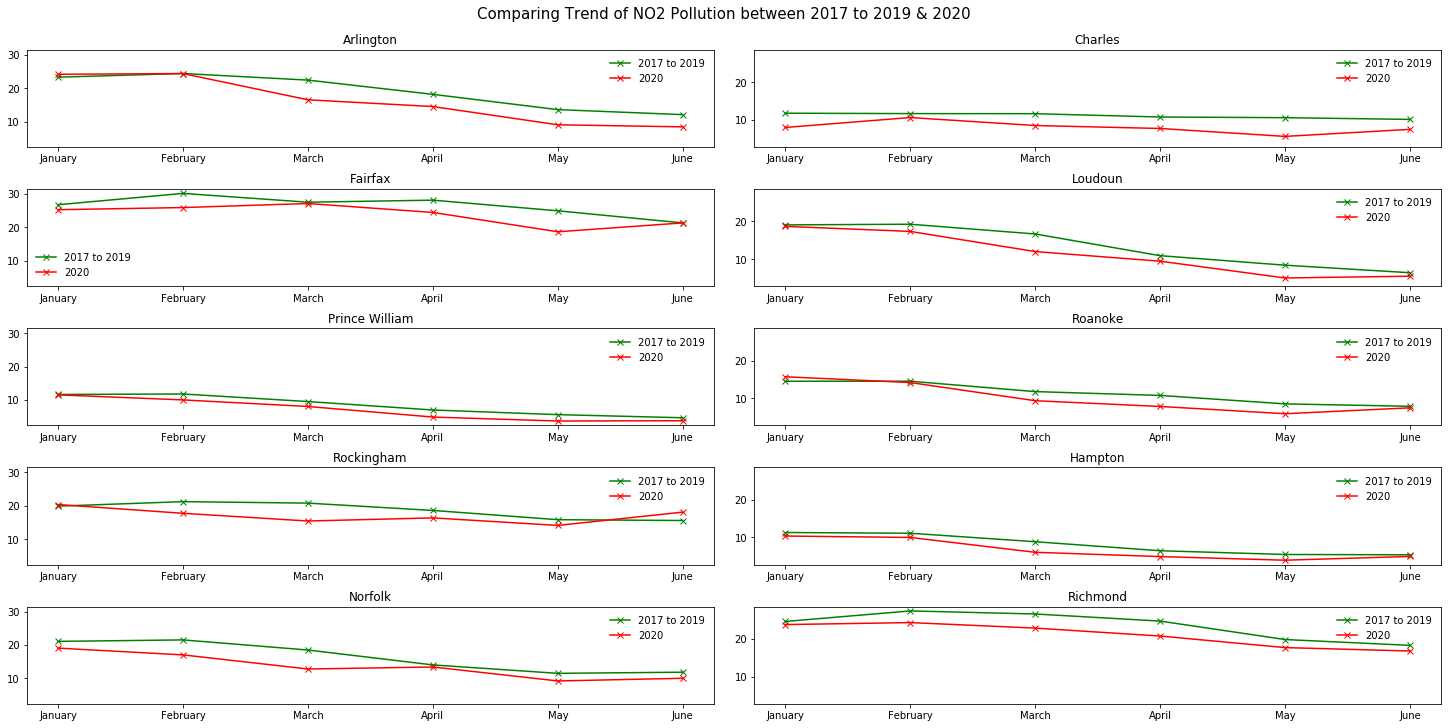

In [21]:
fig, ((ax1, ax2), (ax3,ax4), (ax5,ax6), (ax7,ax8), (ax9,ax10)) = plt.subplots(5, 2, figsize=(20, 10), constrained_layout=True, sharey='col')

fig.suptitle('Comparing Trend of NO2 Pollution between 2017 to 2019 & 2020', size=15)
#For Years 2017 - 2019
# Arlington
ax1.plot(NO22.Date,NO22.DAILY_AQI_VALUE.Arlington,  c='g',marker='x',label='2017 to 2019')
ax1.title.set_text('Arlington')

# Charles
ax2.plot(NO22.Date,NO22.DAILY_AQI_VALUE.Charles,  c='g',marker='x',label='2017 to 2019' )
ax2.title.set_text('Charles')

# Fairfax
ax3.plot(NO22.Date,NO22.DAILY_AQI_VALUE.Fairfax,  c='g',marker='x',label='2017 to 2019')
ax3.title.set_text('Fairfax')

# Loudoun
ax4.plot(NO22.Date,NO22.DAILY_AQI_VALUE.Loudoun, c='g',marker='x',label='2017 to 2019')
ax4.title.set_text('Loudoun')

# Prince William
ax5.plot(NO22.Date,NO22.DAILY_AQI_VALUE['Prince William'], c='g',marker='x',label='2017 to 2019')
ax5.title.set_text('Prince William')

# Roanoke
ax6.plot(NO22.Date,NO22.DAILY_AQI_VALUE.Roanoke, c='g',marker='x',label='2017 to 2019')
ax6.title.set_text('Roanoke')

# Rockingham 
ax7.plot(NO22.Date,NO22.DAILY_AQI_VALUE.Rockingham, c='g',marker='x',label='2017 to 2019')
ax7.title.set_text('Rockingham')

# Hampton 
ax8.plot(NO22.Date,NO22.DAILY_AQI_VALUE['Hampton City'], c='g',marker='x',label='2017 to 2019')
ax8.title.set_text('Hampton')

# Norfolk City 
ax9.plot(NO22.Date,NO22.DAILY_AQI_VALUE['Norfolk City'], c='g',marker='x',label='2017 to 2019')
ax9.title.set_text('Norfolk')

# Hampton 
ax10.plot(NO22.Date,NO22.DAILY_AQI_VALUE['Richmond City'], c='g',marker='x',label='2017 to 2019')
ax10.title.set_text('Richmond')

#For Year 2020
# Arlington
ax1.plot(NO23.Date,NO23.DAILY_AQI_VALUE.Arlington,  c='r',marker='x',label='2020')
ax1.title.set_text('Arlington')

# Charles
ax2.plot(NO23.Date,NO23.DAILY_AQI_VALUE.Charles,  c='r',marker='x',label='2020' )
ax2.title.set_text('Charles')

# Fairfax
ax3.plot(NO23.Date,NO23.DAILY_AQI_VALUE.Fairfax,  c='r',marker='x',label='2020')
ax3.title.set_text('Fairfax')

# Loudoun
ax4.plot(NO23.Date,NO23.DAILY_AQI_VALUE.Loudoun, c='r',marker='x',label='2020')
ax4.title.set_text('Loudoun')

# Prince William
ax5.plot(NO23.Date,NO23.DAILY_AQI_VALUE['Prince William'], c='r',marker='x',label='2020')
ax5.title.set_text('Prince William')

# Roanoke
ax6.plot(NO23.Date,NO23.DAILY_AQI_VALUE.Roanoke, c='r',marker='x',label='2020')
ax6.title.set_text('Roanoke')

# Rockingham 
ax7.plot(NO23.Date,NO23.DAILY_AQI_VALUE.Rockingham, c='r',marker='x',label='2020')
ax7.title.set_text('Rockingham')

# Hampton 
ax8.plot(NO23.Date,NO23.DAILY_AQI_VALUE['Hampton City'], c='r',marker='x',label='2020')
ax8.title.set_text('Hampton')

# Norfolk City 
ax9.plot(NO23.Date,NO23.DAILY_AQI_VALUE['Norfolk City'], c='r',marker='x',label='2020')
ax9.title.set_text('Norfolk')

# Hampton 
ax10.plot(NO23.Date,NO23.DAILY_AQI_VALUE['Richmond City'], c='r',marker='x',label='2020')
ax10.title.set_text('Richmond')

ax=(ax1,ax2,ax4,ax5,ax6,ax7,ax8,ax9,ax10)
for i in ax:
 i.legend(frameon=False,loc='upper right')

ax3.legend(frameon=False,loc='lower left')

plt.show()

#### We've considered just April and May(prime lockdown period) in the below process for deriving the geomap data.

##### Mean value for years between 2019 and 2017

In [22]:
Baseline=NO2[(NO2.Date.dt.year <= 2019) & ((NO2.Date.dt.month==4) | (NO2.Date.dt.month==5)) ][['DAILY_AQI_VALUE']].groupby([NO2.Date.dt.month_name(),NO2.COUNTY],sort=False).mean().unstack()
Baseline

DAILY_AQI_VALUE                                                  \
COUNTY       Arlington    Charles    Fairfax    Loudoun Prince William   
Date                                                                     
April        18.188889  10.775281  28.181818  10.910112       7.011236   
May          13.612903  10.597826  24.989247   8.387097       5.623656   

                                                                      
COUNTY    Roanoke Rockingham Hampton City Norfolk City Richmond City  
Date                                                                  
April   10.755556  18.614458     6.477778    14.033333     24.733333  
May      8.516129  15.847059     5.483146    11.510870     19.838710

##### Mean value for 2020

In [23]:
Lockdown=NO2[(NO2.Date.dt.year == 2020) & ((NO2.Date.dt.month==4) | (NO2.Date.dt.month==5)) ][['DAILY_AQI_VALUE']].groupby([NO2.Date.dt.month_name(),NO2.COUNTY],sort=False).mean().unstack()
Lockdown

DAILY_AQI_VALUE                                                \
COUNTY       Arlington   Charles    Fairfax   Loudoun Prince William   
Date                                                                   
April        14.533333  7.733333  24.500000  9.444444       4.900000   
May           9.064516  5.633333  18.709677  5.000000       3.709677   

                                                                     
COUNTY   Roanoke Rockingham Hampton City Norfolk City Richmond City  
Date                                                                 
April   7.833333  16.384615     4.931034    13.413793     20.766667  
May     5.903226  14.129032     3.967742     9.225806     17.700000

##### Mean Difference

In [24]:
Impact=Lockdown-Baseline
Impact

DAILY_AQI_VALUE                                                         \
COUNTY       Arlington   Charles   Fairfax   Loudoun Prince William   Roanoke   
Date                                                                            
April        -3.655556 -3.041948 -3.681818 -1.465668      -2.111236 -2.922222   
May          -4.548387 -4.964493 -6.279570 -3.387097      -1.913978 -2.612903   

                                                           
COUNTY Rockingham Hampton City Norfolk City Richmond City  
Date                                                       
April   -2.229842    -1.546743    -0.619540     -3.966667  
May     -1.718027    -1.515404    -2.285063     -2.138710

In [25]:
Impact.mean().round(2).sort_values()

                 COUNTY        
DAILY_AQI_VALUE  Fairfax          -4.98
                 Arlington        -4.10
                 Charles          -4.00
                 Richmond City    -3.05
                 Roanoke          -2.77
                 Loudoun          -2.43
                 Prince William   -2.01
                 Rockingham       -1.97
                 Hampton City     -1.53
                 Norfolk City     -1.45
dtype: float64

#### Below is the geo map generated using Paintmaps - an online map generating tool plotted by values from above Impact table. 
##### Note:This is only a base64 encoded image embedded as Markdown for referential purpose. Proper citation has been given in Final Report.

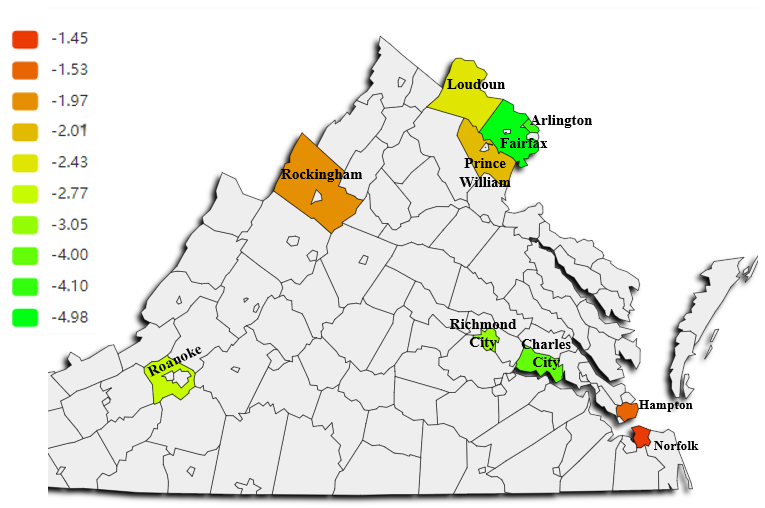